In [76]:
#import all the modules needed
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy import signal
from scipy.fft import fft, fftfreq, ifft
from scipy.signal import get_window

In [77]:
t_earthquake = 75
sampling_rate = 500
def setting_up_earthquake (): 
    earthquake_initial = []
    with open("dataset1.csv") as file_name:
        earthquake_initial = np.loadtxt(file_name, delimiter=" ")


    array_t = np.linspace(0, 75, num=len(earthquake_initial))

    return earthquake_initial

In [78]:
# Known Signal = sum of Sine Waves

def generate_sin(A1,w1,A2,w2,A3,w3,t_max):
    t_list_sin = np.linspace(0,t_max,18750)
    sin_sum = A1*np.sin(w1*t_list_sin) + A2*np.sin(w2*t_list_sin) + A3*np.sin(w3*t_list_sin)

    return sin_sum, t_list_sin

In [79]:
def applying_fft(signal_analysed, samples): 
    
    # Number of samples in normalized_tone
    N = int (sampling_rate * t_earthquake)

    yf = fft(signal_analysed)
    xf = fftfreq(N, 1 / sampling_rate)
    return yf, xf

In [80]:
#function to apply the selected window function
def applying_window_function(window_function, signal_analysed, samples, t): 
    y = window_function*signal_analysed
    x = np.linspace(0, t, samples)
    return y,x

In [90]:
def earthquake_data_hann (): 
    #set the no of samples for the windowing function
    hann_input = int(t_earthquake*sampling_rate)
    samples = int(t_earthquake*sampling_rate)
    #get window function
    window = signal.windows.hann(hann_input)
    #perform the fft, windowing and fft_windowing
    initial_signal = setting_up_earthquake()
    x = np.linspace(0, t_earthquake, samples)
    y_fft, x_fft = applying_fft(initial_signal, samples)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    #plot for unwindowed response
    fig.suptitle('unwindowed response')
    ax1.plot(x, initial_signal, color ="blue")
    ax1.set_xlabel("time/s")
    ax1.set_ylabel("amplitude/m")
    ax2.plot(x_fft, np.abs(y_fft))
    ax2.set_xlim([0, 200])
    ax2.set_ylim([0, 20]) 
    ax2.set_xlabel("frequency/Hz")
    y_window, x_window =applying_window_function (window, initial_signal, samples, t_earthquake)
    #plot for windowed response
    fig, (ax3, ax4) = plt.subplots(1, 2)
    fig.suptitle('hann windowed response')
    ax3.plot(x_window, y_window, color ="blue")
    ax3.set_xlabel("time/s")
    ax3.set_ylabel("amplitude/m")
    y_windowed_fft, x_windowed_fft = applying_fft(y_window, samples)
    ax4.plot(x_windowed_fft, np.abs(y_windowed_fft))
    ax4.set_xlim([0, 200])
    ax4.set_ylim([0, 20]) 
    ax4.set_xlabel("frequency/Hz")
    plt.show()

def earthquake_data_hamming (): 
    #set the no of samples for the windowing function
    hamming_input = int(t_earthquake*sampling_rate)
    samples = int(t_earthquake*sampling_rate)
    #get window function
    window = signal.windows.hamming(hamming_input)
    #perform the fft, windowing and fft_windowing
    initial_signal = setting_up_earthquake()
    x = np.linspace(0, t_earthquake, samples)
    y_fft, x_fft = applying_fft(initial_signal, samples)
    y_window, x_window =applying_window_function (window, initial_signal, samples, t_earthquake)
    #plot for windowed response
    fig, (ax3, ax4) = plt.subplots(1, 2)
    fig.suptitle('hamming windowed response')
    ax3.plot(x_window, y_window, color ="blue")
    ax3.set_xlabel("time/s")
    ax3.set_ylabel("amplitude/m")
    y_windowed_fft, x_windowed_fft = applying_fft(y_window, samples)
    ax4.plot(x_windowed_fft, np.abs(y_windowed_fft))
    ax4.set_xlim([0, 200])
    ax4.set_ylim([0, 20]) 
    ax4.set_xlabel("frequency/Hz")
    plt.show()

def earthquake_data_bartlett (): 
    #set the no of samples for the windowing function
    bartlett_input = int(t_earthquake*sampling_rate)
    samples = int(t_earthquake*sampling_rate)
    #get window function
    window = signal.windows.bartlett(bartlett_input)
    #perform the fft, windowing and fft_windowing
    initial_signal = setting_up_earthquake()
    x = np.linspace(0, t_earthquake, samples)
    y_fft, x_fft = applying_fft(initial_signal, samples)
    y_window, x_window =applying_window_function (window, initial_signal, samples, t_earthquake)
    #plot for windowed response
    fig, (ax3, ax4) = plt.subplots(1, 2)
    fig.suptitle('bartlett windowed response')
    ax3.plot(x_window, y_window, color ="blue")
    ax3.set_xlabel("time/s")
    ax3.set_ylabel("amplitude/m")
    y_windowed_fft, x_windowed_fft = applying_fft(y_window, samples)
    ax4.plot(x_windowed_fft, np.abs(y_windowed_fft))
    ax4.set_xlim([0, 200])
    ax4.set_ylim([0, 20]) 
    ax4.set_xlabel("frequency/Hz")
    plt.show()

def earthquake_data_flattop (): 
    #set the no of samples for the windowing function
    flattop_input = int(t_earthquake*sampling_rate)
    samples = int(t_earthquake*sampling_rate)
    #get window function
    window = signal.windows.flattop(flattop_input)
    #perform the fft, windowing and fft_windowing
    initial_signal = setting_up_earthquake()
    x = np.linspace(0, t_earthquake, samples)
    y_fft, x_fft = applying_fft(initial_signal, samples)
    y_window, x_window =applying_window_function (window, initial_signal, samples, t_earthquake)
    #plot for windowed response
    fig, (ax3, ax4) = plt.subplots(1, 2)
    fig.suptitle('flattop windowed response')
    ax3.plot(x_window, y_window, color ="blue")
    ax3.set_xlabel("time/s")
    ax3.set_ylabel("amplitude/m")
    y_windowed_fft, x_windowed_fft = applying_fft(y_window, samples)
    ax4.plot(x_windowed_fft, np.abs(y_windowed_fft))
    ax4.set_xlim([0, 200])
    ax4.set_ylim([0, 20])
    ax4.set_xlabel("frequency/Hz")
    plt.show()

def earthquake_data_exponential (): 
    #set the no of samples for the windowing function
    exponential_input = int(t_earthquake*sampling_rate)
    tau2 = - (exponential_input-1) / np.log(0.01)
    samples = int(t_earthquake*sampling_rate)
    #get window function
    window = signal.windows.exponential(exponential_input, 0, tau2, False)
    #perform the fft, windowing and fft_windowing
    initial_signal = setting_up_earthquake()
    x = np.linspace(0, t_earthquake, samples)
    y_fft, x_fft = applying_fft(initial_signal, samples)
    y_window, x_window =applying_window_function (window, initial_signal, samples, t_earthquake)
    #plot for windowed response
    fig, (ax3, ax4) = plt.subplots(1, 2)
    fig.suptitle('exponential windowed response')
    ax3.plot(x_window, y_window, color ="blue")
    ax3.set_xlabel("time/s")
    ax3.set_ylabel("amplitude/m")
    y_windowed_fft, x_windowed_fft = applying_fft(y_window, samples)
    ax4.plot(x_windowed_fft, np.abs(y_windowed_fft))
    ax4.set_xlim([0, 200])
    ax4.set_ylim([0, 20]) 
    ax4.set_xlabel("frequency/Hz")
    plt.show()

def earthquake_data_blackman (): 
    #set the no of samples for the windowing function
    blackman_input = int(t_earthquake*sampling_rate)
    samples = int(t_earthquake*sampling_rate)
    #get window function
    window = signal.windows.blackman(blackman_input)
    #perform the fft, windowing and fft_windowing
    initial_signal = setting_up_earthquake()
    x = np.linspace(0, t_earthquake, samples)
    y_fft, x_fft = applying_fft(initial_signal, samples)
    y_window, x_window =applying_window_function (window, initial_signal, samples, t_earthquake)
    #plot for windowed response
    fig, (ax3, ax4) = plt.subplots(1, 2)
    fig.suptitle('blackman windowed response')
    ax3.plot(x_window, y_window, color ="blue")
    ax3.set_xlabel("time/s")
    ax3.set_ylabel("amplitude/m")
    y_windowed_fft, x_windowed_fft = applying_fft(y_window, samples)
    ax4.plot(x_windowed_fft, np.abs(y_windowed_fft))
    ax4.set_xlim([0, 200])
    ax4.set_ylim([0, 20])
    ax4.set_xlabel("frequency/Hz")
    plt.show()



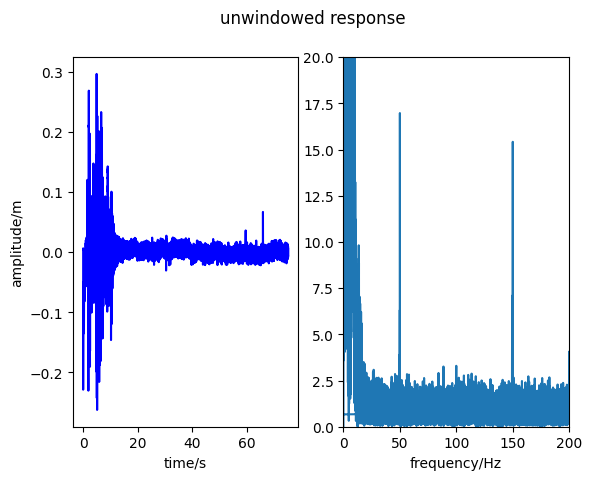

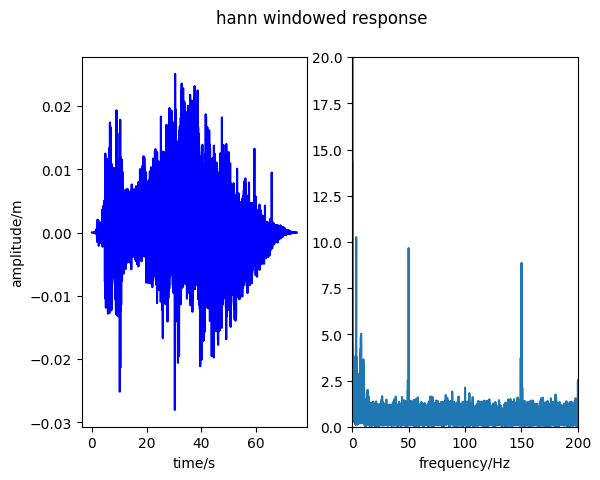

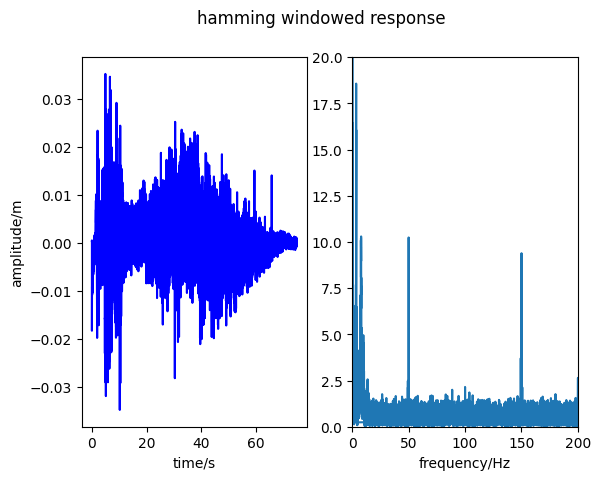

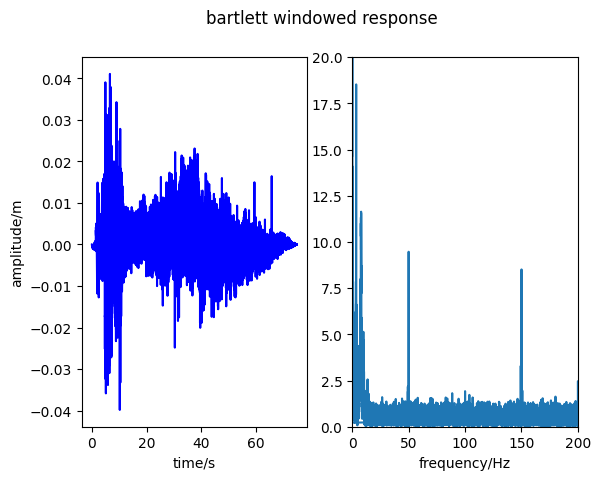

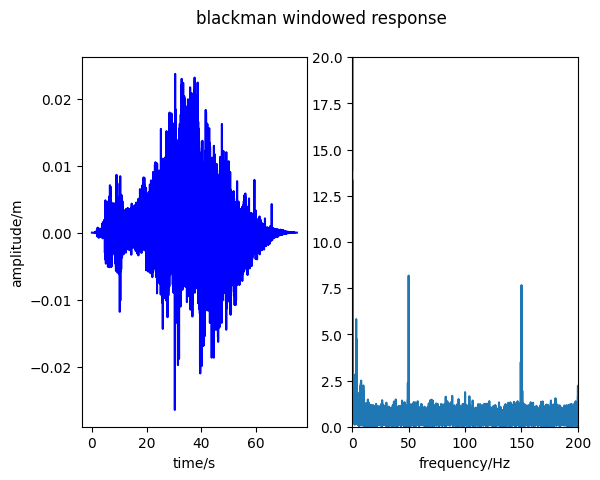

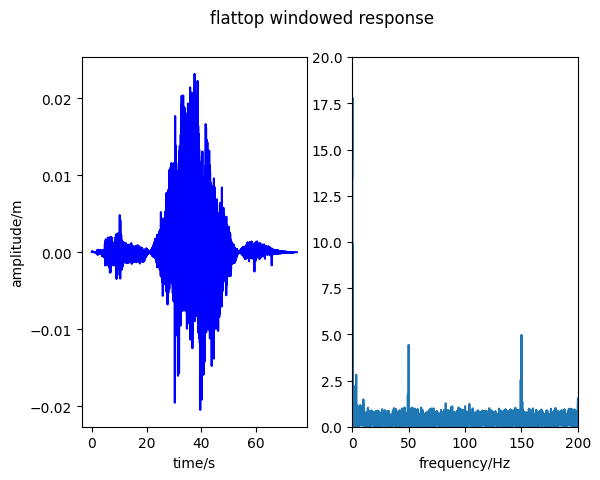

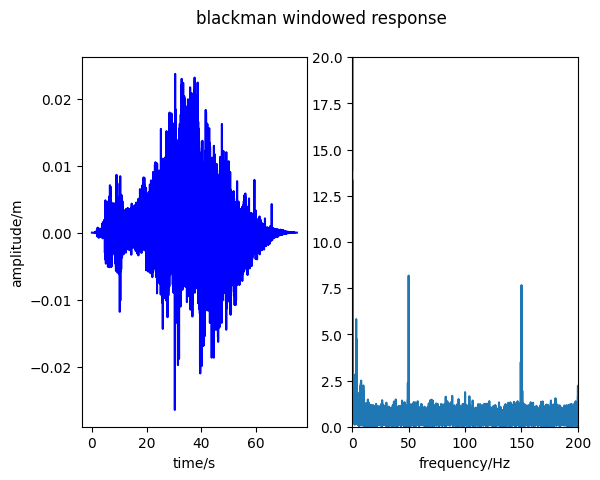

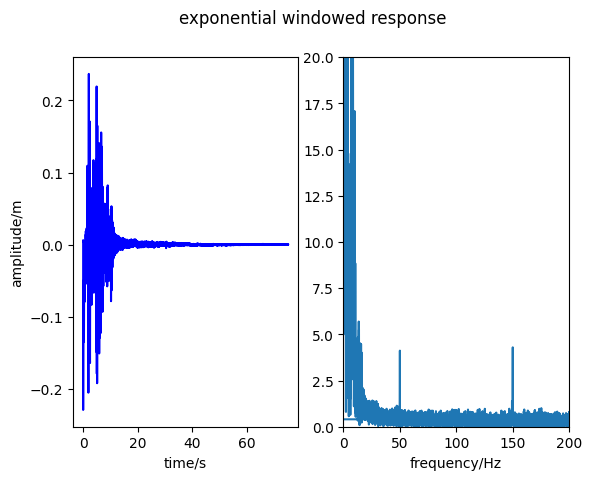

In [91]:
earthquake_data_hann()
earthquake_data_hamming()
earthquake_data_bartlett()
earthquake_data_blackman()
earthquake_data_flattop()
earthquake_data_blackman()

earthquake_data_exponential()




In [92]:
def sine_data_hann (sine_wave): 
    #set the no of samples for the windowing function
    hann_input = int(t_earthquake*sampling_rate)
    samples = int(t_earthquake*sampling_rate)
    #get window function
    window = signal.windows.hann(hann_input)
    #perform the fft, windowing and fft_windowing
    initial_signal = sine_wave
    x = np.linspace(0, t_earthquake, samples)
    y_fft, x_fft = applying_fft(initial_signal, samples)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    #plot for unwindowed response
    fig.suptitle('unwindowed response')
    ax1.plot(x, initial_signal, color ="blue")
    ax1.set_xlabel("time/s")
    ax1.set_ylabel("amplitude/m")
    ax2.plot(x_fft, np.abs(y_fft))
    ax2.set_xlim([0, 200])
    ax2.set_ylim([0, 30000])
    ax2.set_xlabel("frequency/Hz")
    y_window, x_window =applying_window_function (window, initial_signal, samples, t_earthquake)
    #plot for windowed response
    fig, (ax3, ax4) = plt.subplots(1, 2)
    fig.suptitle('hann windowed response')
    ax3.plot(x_window, y_window, color ="blue")
    ax3.set_xlabel("time/s")
    ax3.set_ylabel("amplitude/m")
    y_windowed_fft, x_windowed_fft = applying_fft(y_window, samples)
    ax4.plot(x_windowed_fft, np.abs(y_windowed_fft))
    ax4.set_xlim([0, 200])
    ax4.set_ylim([0, 10000])
    ax4.set_xlabel("frequency/Hz")
    plt.show()

def sine_data_hamming (sine_wave): 
    #set the no of samples for the windowing function
    hamming_input = int(t_earthquake*sampling_rate)
    samples = int(t_earthquake*sampling_rate)
    #get window function
    window = signal.windows.hamming(hamming_input)
    #perform the fft, windowing and fft_windowing
    initial_signal = sine_wave
    x = np.linspace(0, t_earthquake, samples)
    y_fft, x_fft = applying_fft(initial_signal, samples)
    y_window, x_window =applying_window_function (window, initial_signal, samples, t_earthquake)
    #plot for windowed response
    fig, (ax3, ax4) = plt.subplots(1, 2)
    fig.suptitle('hamming windowed response')
    ax3.plot(x_window, y_window, color ="blue")
    ax3.set_xlabel("time/s")
    ax3.set_ylabel("amplitude/m")
    y_windowed_fft, x_windowed_fft = applying_fft(y_window, samples)
    ax4.plot(x_windowed_fft, np.abs(y_windowed_fft))
    ax4.set_xlim([0, 200])
    ax4.set_ylim([0, 10000])
    ax4.set_xlabel("frequency/Hz")
    plt.show()

def sine_data_bartlett (sine_wave): 
    #set the no of samples for the windowing function
    bartlett_input = int(t_earthquake*sampling_rate)
    samples = int(t_earthquake*sampling_rate)
    #get window function
    window = signal.windows.bartlett(bartlett_input)
    #perform the fft, windowing and fft_windowing
    initial_signal = sine_wave
    x = np.linspace(0, t_earthquake, samples)
    y_fft, x_fft = applying_fft(initial_signal, samples)
    y_window, x_window =applying_window_function (window, initial_signal, samples, t_earthquake)
    #plot for windowed response
    fig, (ax3, ax4) = plt.subplots(1, 2)
    fig.suptitle('bartlett windowed response')
    ax3.plot(x_window, y_window, color ="blue")
    ax3.set_xlabel("time/s")
    ax3.set_ylabel("amplitude/m")
    y_windowed_fft, x_windowed_fft = applying_fft(y_window, samples)
    ax4.plot(x_windowed_fft, np.abs(y_windowed_fft))
    ax4.set_xlim([0, 200])
    ax4.set_ylim([0, 10000]) 
    ax4.set_xlabel("frequency/Hz")
    plt.show()

def sine_data_flattop (sine_wave): 
    #set the no of samples for the windowing function
    flattop_input = int(t_earthquake*sampling_rate)
    samples = int(t_earthquake*sampling_rate)
    #get window function
    window = signal.windows.flattop(flattop_input)
    #perform the fft, windowing and fft_windowing
    initial_signal = sine_wave
    x = np.linspace(0, t_earthquake, samples)
    y_fft, x_fft = applying_fft(initial_signal, samples)
    y_window, x_window =applying_window_function (window, initial_signal, samples, t_earthquake)
    #plot for windowed response
    fig, (ax3, ax4) = plt.subplots(1, 2)
    fig.suptitle('flattop windowed response')
    ax3.plot(x_window, y_window, color ="blue")
    ax3.set_xlabel("time/s")
    ax3.set_ylabel("amplitude/m")
    y_windowed_fft, x_windowed_fft = applying_fft(y_window, samples)
    ax4.plot(x_windowed_fft, np.abs(y_windowed_fft))
    ax4.set_xlim([0, 200])
    ax4.set_ylim([0, 10000])
    ax4.set_xlabel("frequency/Hz")
    plt.show()

def sine_data_exponential (sine_wave): 
    #set the no of samples for the windowing function
    exponential_input = int(t_earthquake*sampling_rate)
    tau2 = - (exponential_input-1) / np.log(0.01)

    samples = int(t_earthquake*sampling_rate)
    #get window function
    window = signal.windows.exponential(exponential_input, 0, tau2, False)
    #perform the fft, windowing and fft_windowing
    initial_signal = sine_wave
    x = np.linspace(0, t_earthquake, samples)
    y_fft, x_fft = applying_fft(initial_signal, samples)
    y_window, x_window =applying_window_function (window, initial_signal, samples, t_earthquake)
    #plot for windowed response
    fig, (ax3, ax4) = plt.subplots(1, 2)
    fig.suptitle('exponential windowed response')
    ax3.plot(x_window, y_window, color ="blue")
    ax3.set_xlabel("time/s")
    ax3.set_ylabel("amplitude/m")
    y_windowed_fft, x_windowed_fft = applying_fft(y_window, samples)
    ax4.plot(x_windowed_fft, np.abs(y_windowed_fft))
    ax4.set_xlim([0, 200])
    ax4.set_ylim([0, 10000])
    ax4.set_xlabel("frequency/Hz")
    plt.show()

def sine_data_blackman (sine_wave): 
    #set the no of samples for the windowing function
    blackman_input = int(t_earthquake*sampling_rate)
    samples = int(t_earthquake*sampling_rate)
    #get window function
    window = signal.windows.blackman(blackman_input)
    #perform the fft, windowing and fft_windowing
    initial_signal = sine_wave
    x = np.linspace(0, t_earthquake, samples)
    y_fft, x_fft = applying_fft(initial_signal, samples)
    y_window, x_window =applying_window_function (window, initial_signal, samples, t_earthquake)
    #plot for windowed response
    fig, (ax3, ax4) = plt.subplots(1, 2)
    fig.suptitle('blackman windowed response')
    ax3.plot(x_window, y_window, color ="blue")
    ax3.set_xlabel("time/s")
    ax3.set_ylabel("amplitude/m")
    y_windowed_fft, x_windowed_fft = applying_fft(y_window, samples)
    ax4.plot(x_windowed_fft, np.abs(y_windowed_fft))
    ax4.set_xlim([0, 200])
    ax4.set_ylim([0, 10000]) 
    ax4.set_xlabel("frequency/Hz")
    plt.show()

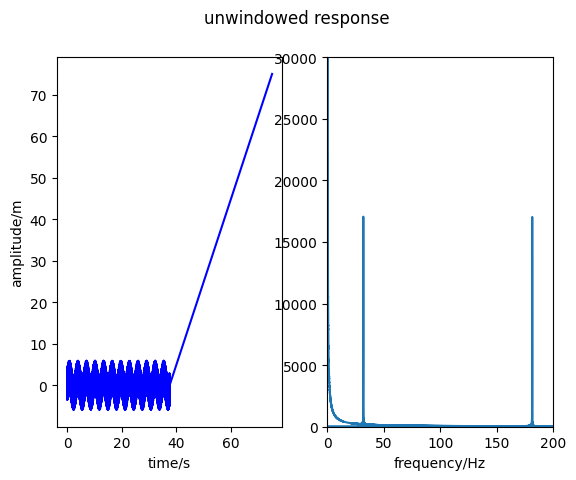

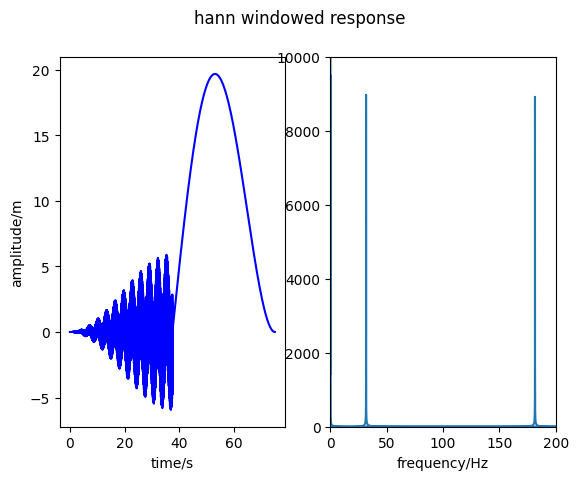

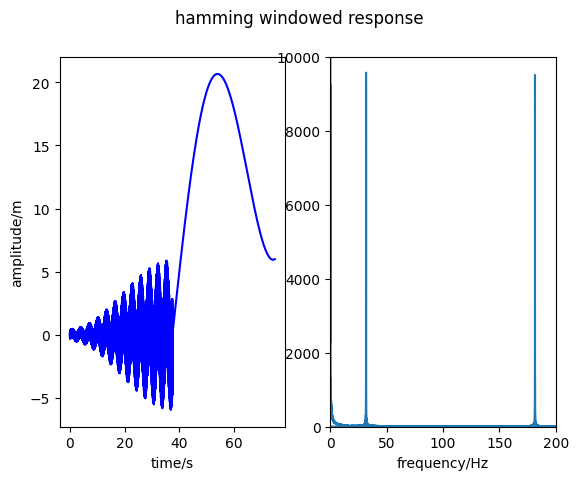

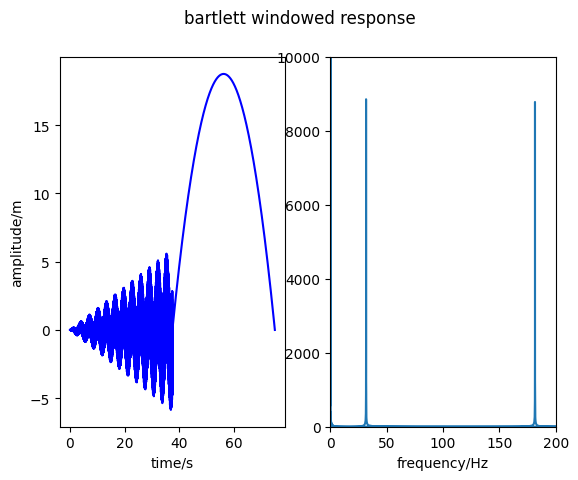

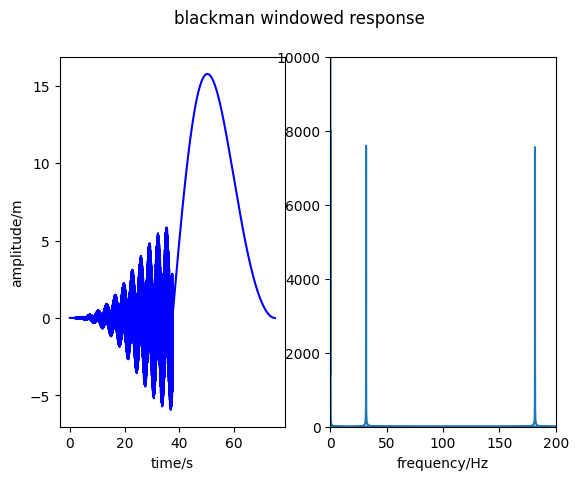

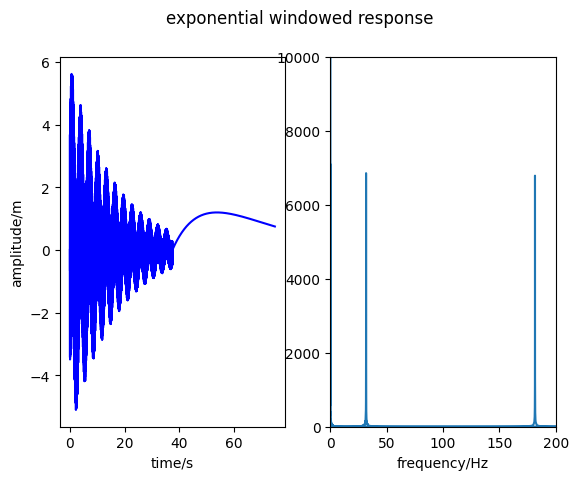

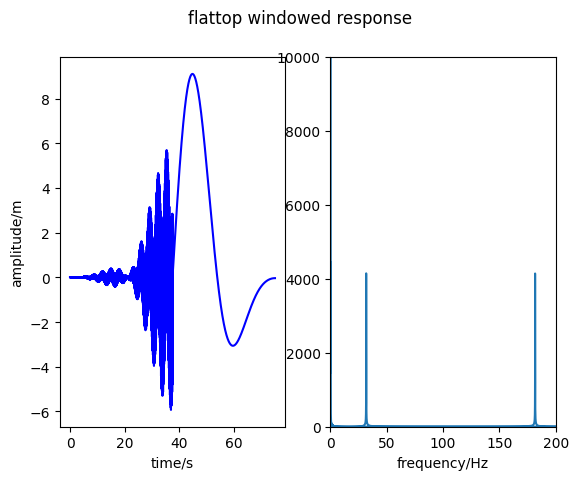

In [93]:
sine_wave = generate_sin(2, 1, 2, 1000, 2, 100, 75)
sine_wave_array = np.array(sine_wave)
#change the shape of the array so readable for matplotlib
sine_wave_initial_input = sine_wave_array.ravel()
sine_data_hann(sine_wave_initial_input.copy())
sine_data_hamming(sine_wave_initial_input.copy())
sine_data_bartlett(sine_wave_initial_input.copy())
sine_data_blackman(sine_wave_initial_input.copy())
sine_data_exponential(sine_wave_initial_input.copy())
sine_data_flattop(sine_wave_initial_input.copy())
